In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, Conv1D, Flatten, Conv2DTranspose, Conv1DTranspose
from keras.datasets import cifar10
from keras.regularizers import l1
from keras.optimizers import Adam

In [2]:

(x_train,_),(x_test,_) = cifar10.load_data()

In [3]:

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), -1))

x_test = x_test.reshape((len(x_test),-1))

In [4]:
x_train.shape

(50000, 3072)

In [5]:
mean = 0
std = 10
gauss_noise = np.random.normal(mean,std,size=x_train.shape) 
gauss_noise_test = np.random.normal(mean,std,size=x_test.shape) 
noise_factor = 0.02 
x_train_noisy = x_train + noise_factor * gauss_noise
x_test_noisy = x_test + noise_factor * gauss_noise_test

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

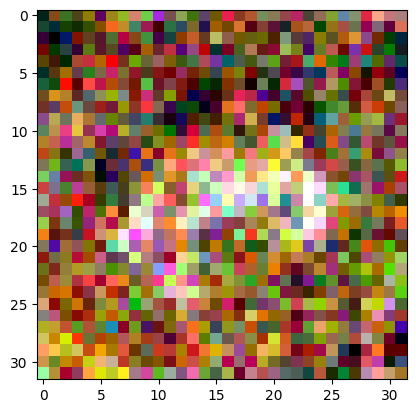

In [6]:
plt.imshow(x_train_noisy[0].reshape(32,32,3))

In [7]:
input_size = 32*32*3
hidden_size = 256
code_size = 128

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)

encoder = Model(input_img,code)

code_enc = Input(shape=(code_size,))
a = Dense(hidden_size, activation='relu')(code_enc)
decoded = Dense(input_size, activation='sigmoid')(a)

decoder = Model(code_enc,decoded)


autoencoder.compile(optimizer='adam', loss='MSE')


In [8]:
input_size = 32*32*3
hidden_size = 256
code_size = 128
input_img2 = Input(shape=(input_size,))
hidden_1_ = Dense(hidden_size, activation='relu')(input_img2)
code2 = Dense(code_size, activation='relu')(hidden_1_)

mean = 0
std = 10
gauss_noise = np.random.normal(mean,std,size=code_size) 
noise_factor = 0.02 
code2 = code2 + noise_factor * gauss_noise

hidden_2_ = Dense(hidden_size, activation='relu')(code2)
output_img2 = Dense(input_size, activation='sigmoid')(hidden_2_)
autoencoder_noisy = Model(input_img2, output_img2)

encoder2 =Model(input_img2,code2)


## add noise
code_enc2 = Input(shape=(code_size,))
a2 = Dense(hidden_size, activation='relu')(code_enc2)
decoded2 = Dense(input_size, activation='sigmoid')(a2)

decoder2 = Model(code_enc2,decoded2)

autoencoder_noisy.compile(optimizer='adam', loss='MSE')

In [9]:
autoencoder.fit(x_train_noisy, x_train,

epochs=10,

shuffle=True

)




Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.0240
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0151
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0137
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0130
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.0126
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.0123
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0121
Epoch 8/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.0119
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0118
Epoch 10/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0117


In [10]:
autoencoder.evaluate(x_test_noisy,x_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0118


0.011834511533379555

In [11]:
k = 0

for i in range (4,8):

    decoder.weights[k].assign(autoencoder.weights[i])

    k = k+1

In [12]:
encoded_imgs = encoder.predict(x_test_noisy)

decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 2s 5ms/step


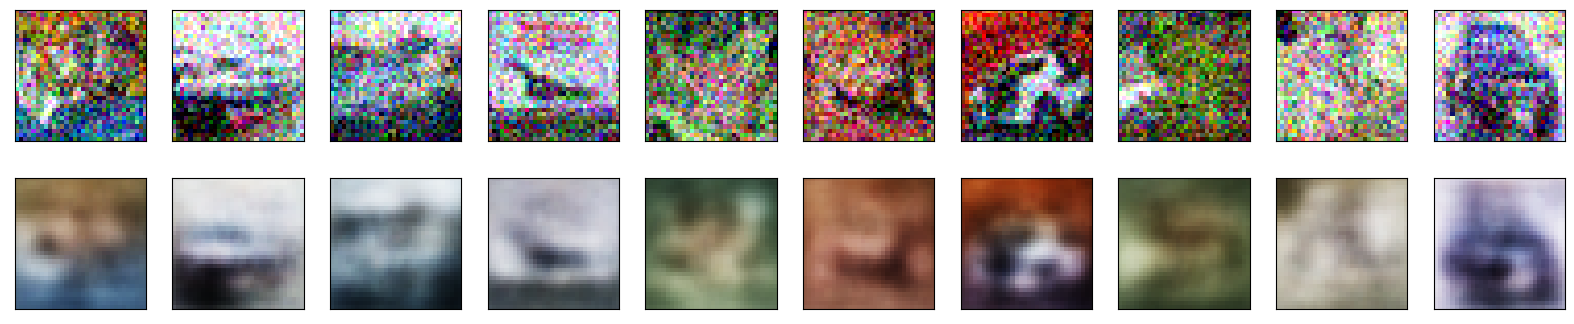

In [13]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    #original

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test_noisy[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)
    #reconstructed

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()

In [14]:
autoencoder_noisy.fit(x_train, x_train,

epochs=2,

shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 44s 28ms/step - loss: 0.0194
Epoch 2/2
1563/1563 [==============================] - 41s 26ms/step - loss: 0.0134


In [15]:
autoencoder_noisy.evaluate(x_test,x_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0129


0.012922445312142372

In [16]:
k = 0

for i in range (4,8):

    decoder2.weights[k].assign(autoencoder_noisy.weights[i])

    k = k+1

In [17]:
encoded_imgs = encoder2.predict(x_test_noisy)

decoded_imgs_2 = decoder2.predict(encoded_imgs)

313/313 [==============================] - 2s 6ms/step


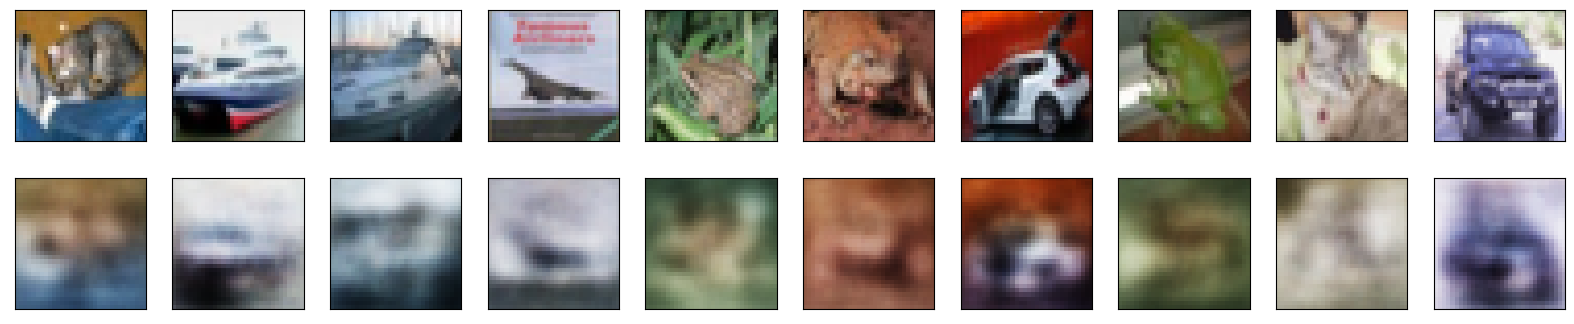

In [18]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()

In [19]:
### do PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=128)

pca.fit(x_train_noisy)

x_train_pca = pca.transform(x_train_noisy)

x_test_pca = pca.transform(x_test_noisy)

In [20]:
### decompress PCA

x_train_pca_recon = pca.inverse_transform(x_train_pca)

x_test_pca_recon = pca.inverse_transform(x_test_pca)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


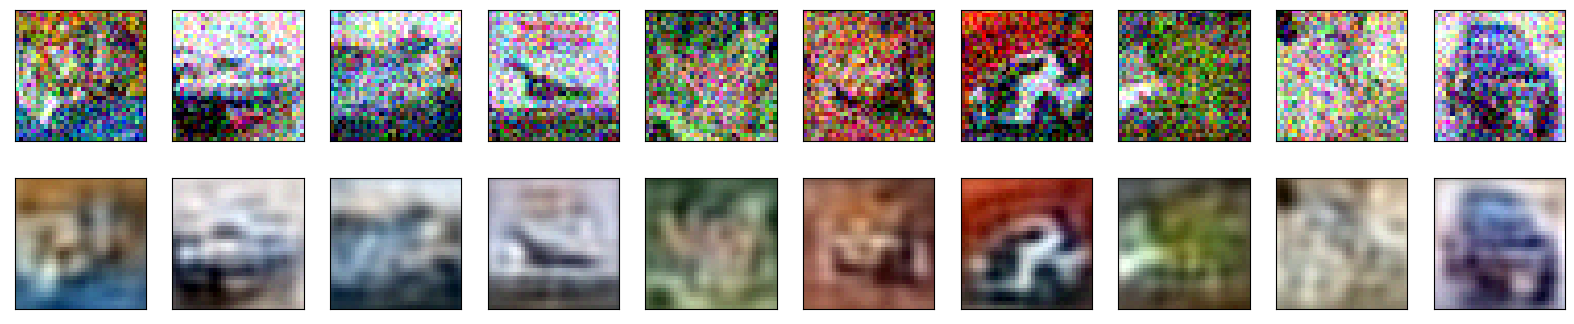

In [21]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test_noisy[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(x_test_pca_recon[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


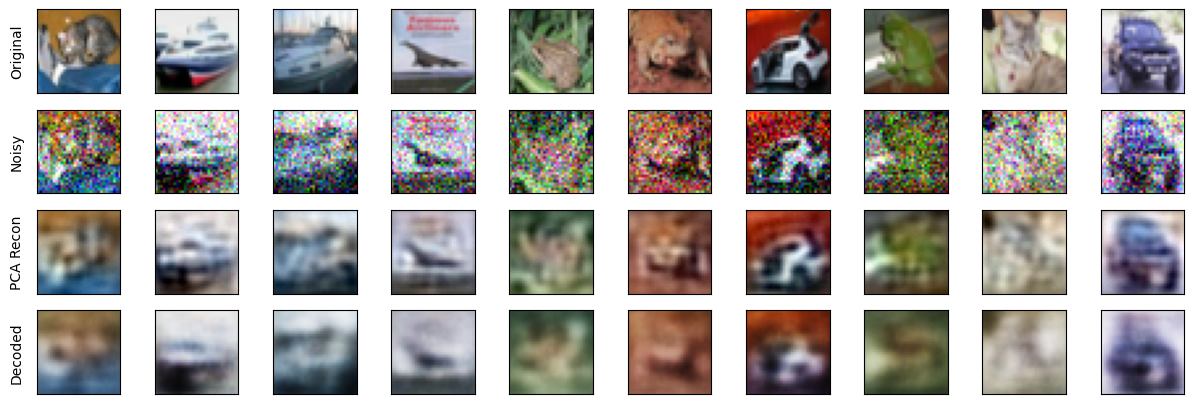

In [22]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(15, 5))

for i in range(n):
    # Original Image
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    if i == 0:
        plt.text(-0.15, 0.5, 'Original', va='center', ha='right', rotation='vertical', transform=ax.transAxes)

    # Noisy Image
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    if i == 0:
        plt.text(-0.15, 0.5, 'Noisy', va='center', ha='right', rotation='vertical', transform=ax.transAxes)

    # PCA Reconstructed Image
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(x_test_pca_recon[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    if i == 0:
        plt.text(-0.15, 0.5, 'PCA Recon', va='center', ha='right', rotation='vertical', transform=ax.transAxes)

    # Decoded Image
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    if i == 0:
        plt.text(-0.15, 0.5, 'Decoded', va='center', ha='right', rotation='vertical', transform=ax.transAxes)

plt.show()

In [23]:
input_size = 32*32*3
hidden_size = 256
code_size = 128

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
code = tf.expand_dims(code, axis=2)
## conv1d
# code = code.reshape(-1,1,code_size)

print(code.shape)

hidden_2 = Conv1D(filters=34, activation='relu',kernel_size=95)(code)

print(hidden_2.shape)

hidden_2 = tf.expand_dims(hidden_2, axis=3)
output_img = Conv2D(filters=3, activation='sigmoid',kernel_size=3)(hidden_2)

output_img = Flatten()(output_img)
print(output_img.shape)

autoencoder = Model(input_img, output_img)

encoder = Model(input_img,code)

code_enc = Input(shape=(code_size,))
code_enc = tf.expand_dims(code_enc, axis=1)
a = Conv1D(filters=1, activation='relu',kernel_size=3,padding='same')(code_enc)
decoded = Conv1D(filters=1, activation='sigmoid',kernel_size=3,padding='same')(a)

decoder3 = Model(code_enc,decoded)


autoencoder.compile(optimizer='adam', loss='MSE')


(None, 128, 1)
(None, 34, 34)
(None, 3072)


In [24]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
import tensorflow as tf

input_shape = (32, 32, 3)  # Assuming 32x32 RGB images
latent_dim = 128  # Size of the latent space

# Encoder
encoder_input = Input(shape=input_size)
x = Dense(512, activation='relu')(encoder_input)
latent = Dense(latent_dim, activation='relu')(x)

# Decoder
x = Dense(512, activation='relu')(latent)
x = Dense(8 * 8 * 64, activation='relu')(x)  # Prepare for 2D convolution
x = Reshape((8, 8, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_output = Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
decoder_output = Flatten()(decoder_output)
# Autoencoder
autoencoder = Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Display the model
autoencoder.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_14 (Dense)            (None, 512)               1573376   
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 512)               66048     
                                                                 
 dense_17 (Dense)            (None, 4096)              2101248   
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       3692

In [25]:
autoencoder.fit(x_train_noisy, x_train,

epochs=5,

shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 179s 114ms/step - loss: 0.0203
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 0.0137
Epoch 3/5
1563/1563 [==============================] - 143s 91ms/step - loss: 0.0124
Epoch 4/5
1563/1563 [==============================] - 147s 94ms/step - loss: 0.0118
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: 0.0116


In [30]:
autoencoder.evaluate(x_test_noisy,x_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0116


0.011625861749053001

In [ ]:
k = 0

for i in range (4,8):

    decoder3.weights[k].assign(autoencoder.weights[i])

    k = k+1

In [ ]:
encoded_imgs = encoder.predict(x_test_noisy)

decoded_imgs_3 = decoder3.predict(encoded_imgs)

In [55]:
decoded_imgs_3 = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


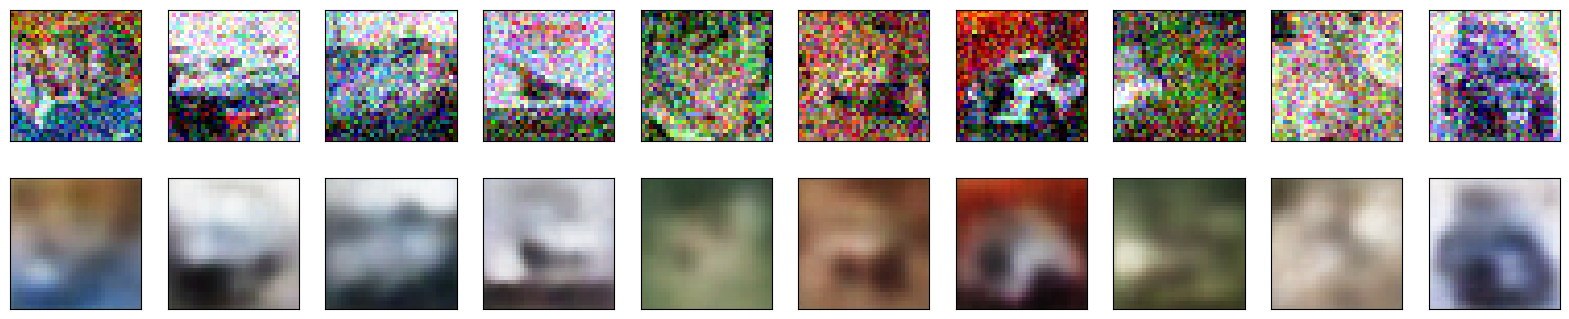

In [56]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test_noisy[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs_3[i].reshape(32, 32,3))

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()